In [22]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import ast
from collections import Counter

In [2]:
# Loading the dataset
articles_dataset = pd.read_csv('Dataset/medium_articles.csv')

In [3]:
# Printing shape and dataset
print(articles_dataset.shape, '\n')
articles_dataset

(192368, 6) 



,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."
...,...,...,...,...,...,...
192363,Why do you need a cleaning service?,What could be more important than having a tid...,https://medium.com/@ozneedcleaningau/why-do-yo...,[],2021-11-16 08:17:08.950000+00:00,"['Cleaning', 'Cleaning Services', 'Cleaning Co..."
192364,Daily cleaning and maintenance of bedding,Daily cleaning and maintenance of bedding\n\nW...,https://medium.com/@a198blwt/daily-cleaning-an...,[],2021-11-16 05:27:05.359000+00:00,"['Bedding', 'Cleaning', 'Maintain']"
192365,Beneficial Advice on Bond Cleaning!,The most important chore at the end is bond cl...,https://medium.com/@princegohil/beneficial-adv...,['Prince Shrawan'],2021-11-26 08:20:27.660000+00:00,"['Cleaning', 'End Of Lease Cleaning', 'Cleaners']"
192366,How I Learned Romanian in 37 Easy Steps,How I Learned Romanian in 37 Easy Steps\n\nHey...,https://medium.com/@lifeinromania/how-i-learne...,['Sam Ursu'],2017-11-27 08:09:19.025000+00:00,"['Romania', 'Language Learning', 'Storyofmylife']"


In [4]:
# Printing info of the dataset
articles_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      192363 non-null  object
 1   text       192368 non-null  object
 2   url        192368 non-null  object
 3   authors    192368 non-null  object
 4   timestamp  192366 non-null  object
 5   tags       192368 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


<hr>

In [5]:
# Checking for missing values
articles_dataset.isnull().sum()

title        5
text         0
url          0
authors      0
timestamp    2
tags         0
dtype: int64

In [6]:
# Deleting rows with missing values
articles_dataset.dropna(inplace=True)

In [7]:
# Printing shape and after deleting missing values
print(articles_dataset.shape, '\n')
articles_dataset.isnull().sum()

(192361, 6) 



title        0
text         0
url          0
authors      0
timestamp    0
tags         0
dtype: int64

<hr>

In [8]:
print(f'There are {len(articles_dataset['url'].unique())} unique articles in the dataset.')

There are 192361 unique articles in the dataset.


-> This means that all the articles are unique. They all have unique url.

<hr>

In [9]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to C:\Users\Abdul Rehman
[nltk_data]     Tahir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Abdul Rehman
[nltk_data]     Tahir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

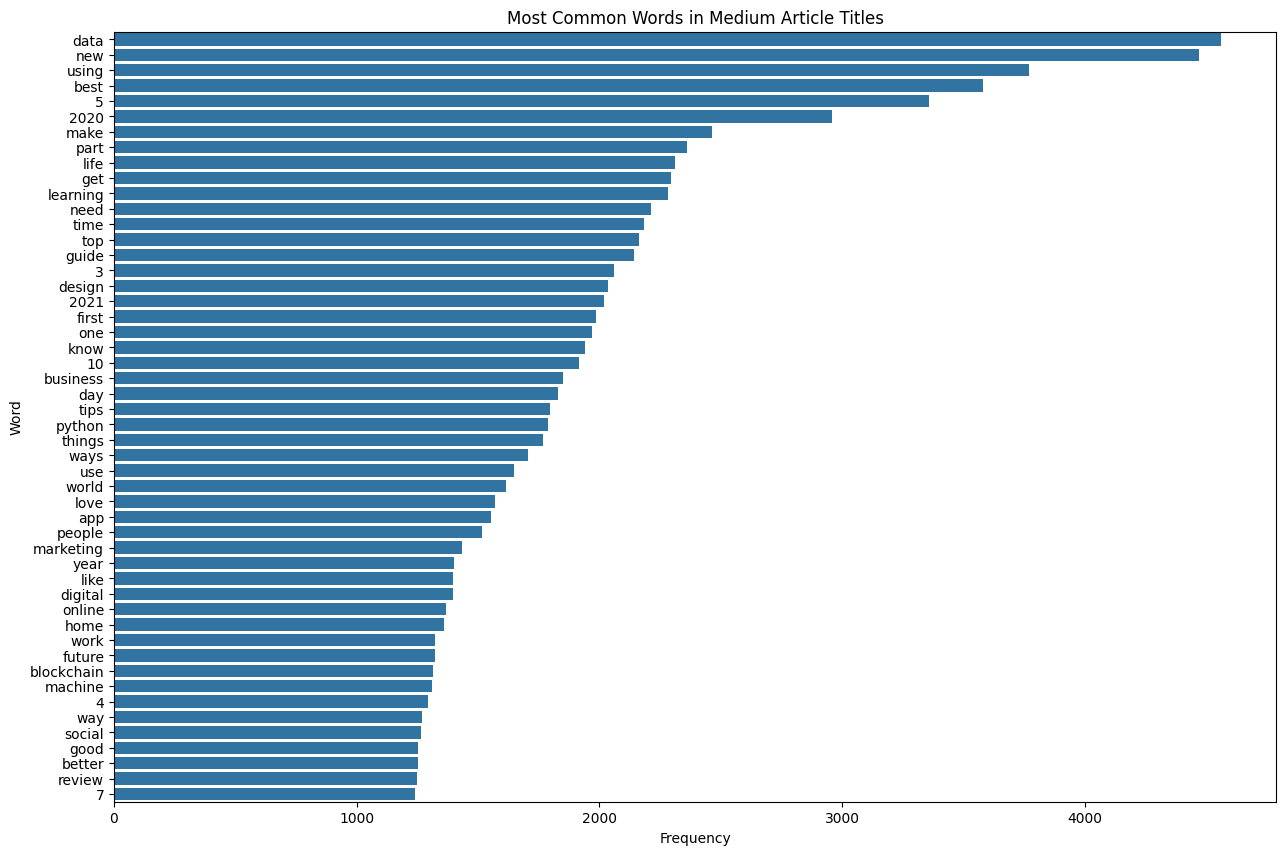

In [12]:
# Tokenize the titles and remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
tokenizer = nltk.tokenize.word_tokenize

title_words = articles_dataset['title'].str.lower().str.split().explode()
title_words_clean = title_words[title_words.str.isalnum() & ~title_words.isin(stop_words)]

# Find the most common words
word_freq = Counter(title_words_clean).most_common(50)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(15, 10))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('Most Common Words in Medium Article Titles')
plt.show()

<hr>

In [13]:
# Checking the distribution of text length in articles
articles_dataset['text_length'] = articles_dataset['text'].str.len()
articles_dataset['text_length'].describe()

count    192361.000000
mean       5097.857570
std        5206.122114
min          10.000000
25%        1952.000000
50%        3837.000000
75%        6591.000000
max      100000.000000
Name: text_length, dtype: float64

<Axes: xlabel='text_length', ylabel='Count'>

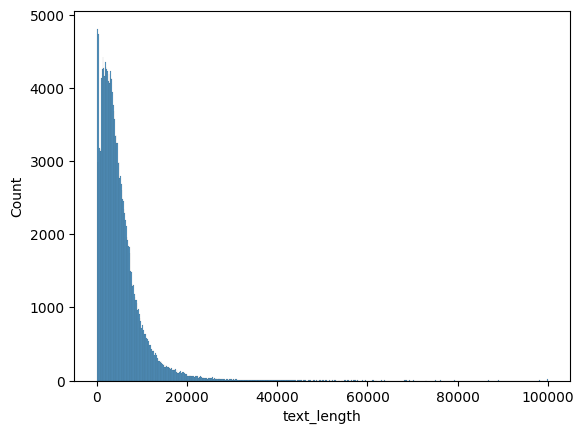

In [17]:
sns.histplot(articles_dataset['text_length'])

<Axes: ylabel='text_length'>

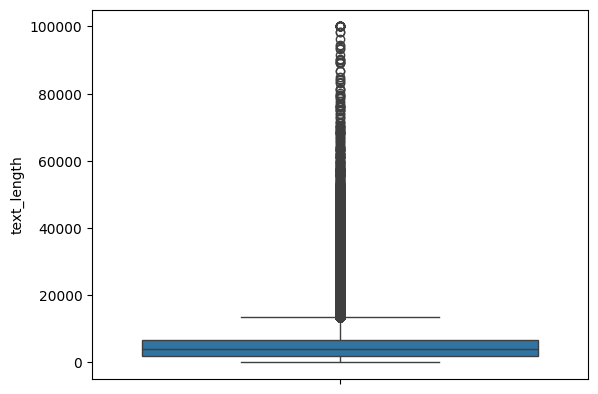

In [18]:
# Checking for outliers in the text length
sns.boxplot(articles_dataset['text_length'])

<hr>

In [19]:
# Checking the distribution of title length in articles
articles_dataset["title_length"] = articles_dataset["title"].str.len()
articles_dataset["title_length"].describe()

count    192361.000000
mean         46.878889
std          23.179043
min           1.000000
25%          31.000000
50%          45.000000
75%          60.000000
max         200.000000
Name: title_length, dtype: float64

<Axes: xlabel='title_length', ylabel='Count'>

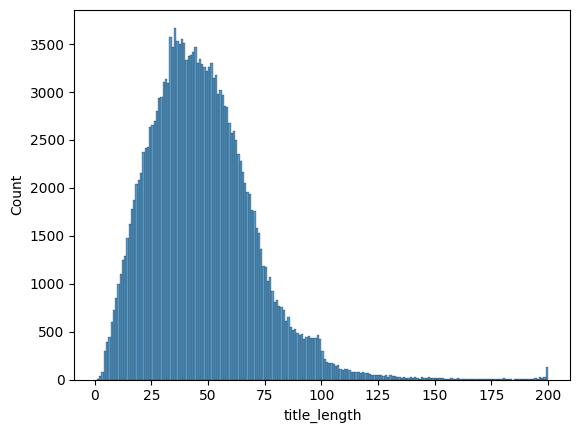

In [20]:
sns.histplot(articles_dataset["title_length"])

<Axes: ylabel='title_length'>

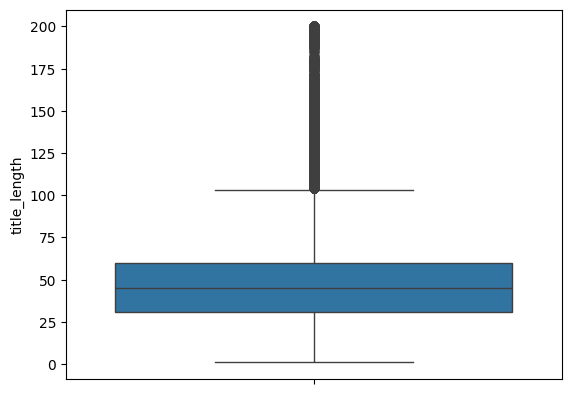

In [21]:
sns.boxplot(articles_dataset["title_length"])

<hr>

In [23]:
# Checking the distribution of tags in articles
articles_dataset['num_tags'] = articles_dataset['tags'].apply(lambda x: len(ast.literal_eval(x)))
articles_dataset['num_tags'].describe()

count    192361.000000
mean          4.577737
std           0.873526
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: num_tags, dtype: float64

<Axes: xlabel='num_tags', ylabel='Count'>

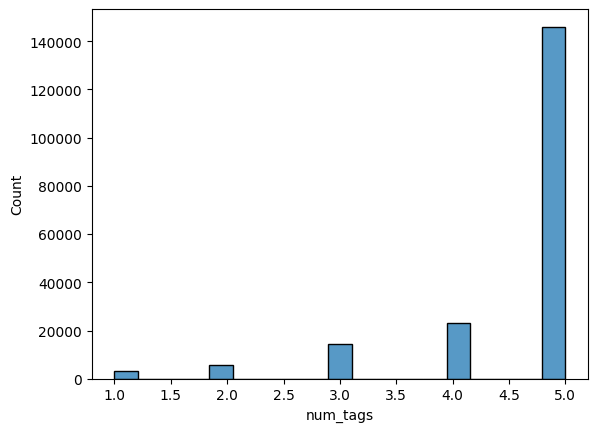

In [24]:
sns.histplot(articles_dataset['num_tags'])

<hr>

In [26]:
# Checking distribution of authors in articles
articles_dataset['num_authors'] = articles_dataset['authors'].apply(lambda x: len(ast.literal_eval(x)))
articles_dataset['num_authors'].describe()

count    192361.000000
mean          0.854446
std           0.399987
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: num_authors, dtype: float64

<Axes: xlabel='num_authors', ylabel='Count'>

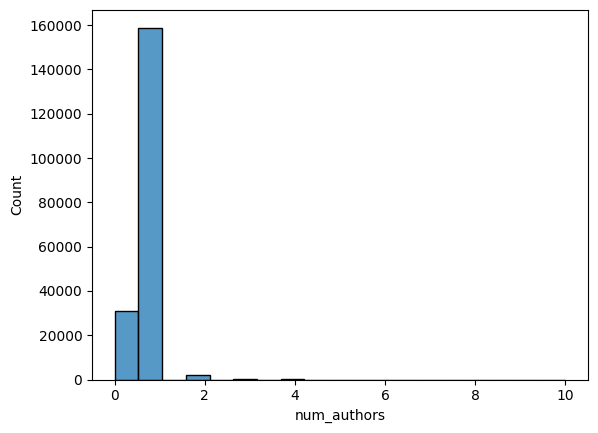

In [27]:
sns.histplot(articles_dataset['num_authors'])

<hr>

In [28]:
# Printing shape and dataset after preprocessing
print(articles_dataset.shape, '\n')
articles_dataset

(192361, 10) 



,title,text,url,authors,timestamp,tags,text_length,title_length,num_tags,num_authors
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",5018,19,5,1
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",7293,25,5,1
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",5730,14,5,0
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",146,24,5,1
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",2326,32,5,1
...,...,...,...,...,...,...,...,...,...,...
192363,Why do you need a cleaning service?,What could be more important than having a tid...,https://medium.com/@ozneedcleaningau/why-do-yo...,[],2021-11-16 08:17:08.950000+00:00,"['Cleaning', 'Cleaning Services', 'Cleaning Co...",2845,35,5,0
192364,Daily cleaning and maintenance of bedding,Daily cleaning and maintenance of bedding\n\nW...,https://medium.com/@a198blwt/daily-cleaning-an...,[],2021-11-16 05:27:05.359000+00:00,"['Bedding', 'Cleaning', 'Maintain']",2643,41,3,0
192365,Beneficial Advice on Bond Cleaning!,The most important chore at the end is bond cl...,https://medium.com/@princegohil/beneficial-adv...,['Prince Shrawan'],2021-11-26 08:20:27.660000+00:00,"['Cleaning', 'End Of Lease Cleaning', 'Cleaners']",1959,35,3,1
192366,How I Learned Romanian in 37 Easy Steps,How I Learned Romanian in 37 Easy Steps\n\nHey...,https://medium.com/@lifeinromania/how-i-learne...,['Sam Ursu'],2017-11-27 08:09:19.025000+00:00,"['Romania', 'Language Learning', 'Storyofmylife']",10772,39,3,1


In [29]:
# Printing info of the dataset after preprocessing
articles_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192361 entries, 0 to 192367
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         192361 non-null  object
 1   text          192361 non-null  object
 2   url           192361 non-null  object
 3   authors       192361 non-null  object
 4   timestamp     192361 non-null  object
 5   tags          192361 non-null  object
 6   text_length   192361 non-null  int64 
 7   title_length  192361 non-null  int64 
 8   num_tags      192361 non-null  int64 
 9   num_authors   192361 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.1+ MB


In [30]:
articles_dataset.to_csv('Dataset/medium_articles_preprocessed.csv', index=False)

<hr>